In [29]:
import osmnx as ox
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

C:\Users\koste\anaconda3\Lib\site-packages\osmnx\simplification.py:585: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  merged = gdf_nodes.buffer(tolerance).union_all()
C:\Users\koste\anaconda3\Lib\site-packages\osmnx\simplification.py:640: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  centroids = node_clusters.centroid


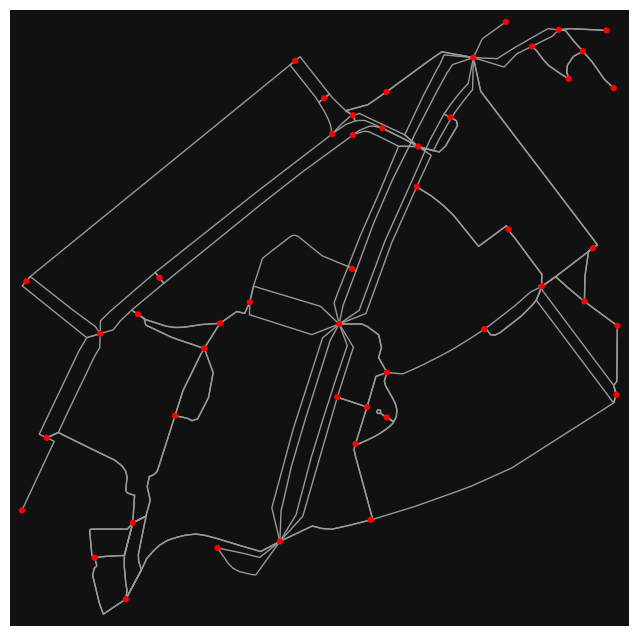

Number of nodes in the graph: 48


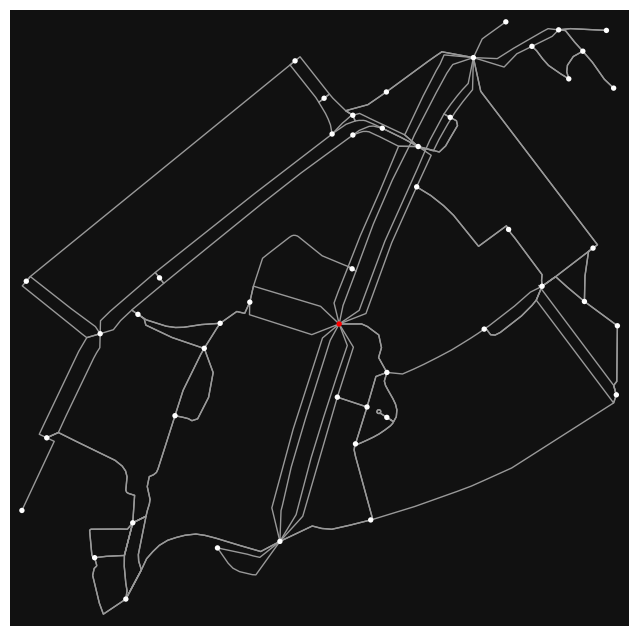

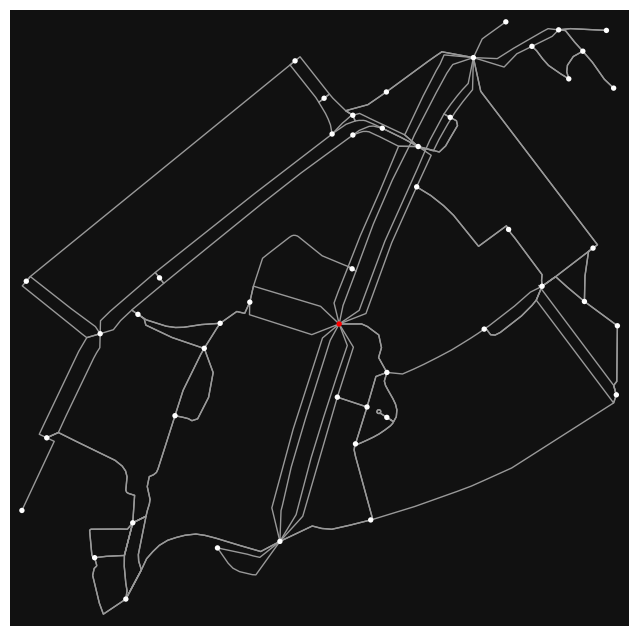

Aantal knooppunten: 48


In [31]:
G = ox.graph_from_address(address="Churchillplein, Den Haag, Netherlands",dist=300)
###################### Alternative adresss############################################
############G = ox.graph_from_address(address="Churchillplein, Den Haag, Netherlands",dist=285)##################
G = ox.simplification.consolidate_intersections(
    G,
    tolerance=0.00013,  # Try 30-50 meters to cover roundabout radius
    rebuild_graph=True,
    dead_ends=False,
    reconnect_edges=True
)
ox.plot_graph(G, node_size=20,node_color='red')
num_nodes = len(G.nodes())
print(f"Number of nodes in the graph: {num_nodes}")
# Number 13 centre road
# Number 19 upper road
# Number 21 centre road middle node
node_id = list(G.nodes)[13]  # node 13 is center big road (research node)
ox.plot_graph(G, node_color=["red" if n == node_id else "white" for n in G.nodes()])
node_id_2 = list(G.nodes)[21]  # node 13 is center big road (research node)
ox.plot_graph(G, node_color=["red" if n == node_id else "white" for n in G.nodes()])


num_nodes = G.number_of_nodes()
num_edges = G.number_of_edges()
print("Aantal knooppunten:", num_nodes)
#Dprint("Aantal edges:", num_edges)



In [33]:
#Node removal 
if node_id in G.nodes:
    G.remove_node(node_id)
    G.remove_node(node_id_2)
    print(f"Node {node_id, node_id_2} removed successfully.")
else:
    print("Node not found.")

num_nodes = len(G.nodes)

# Remove a single node (e.g., the first one in the list)
#G.remove_node(nodes[0])
print("Number of nodes:", num_nodes)



Node (13, 21) removed successfully.
Number of nodes: 46


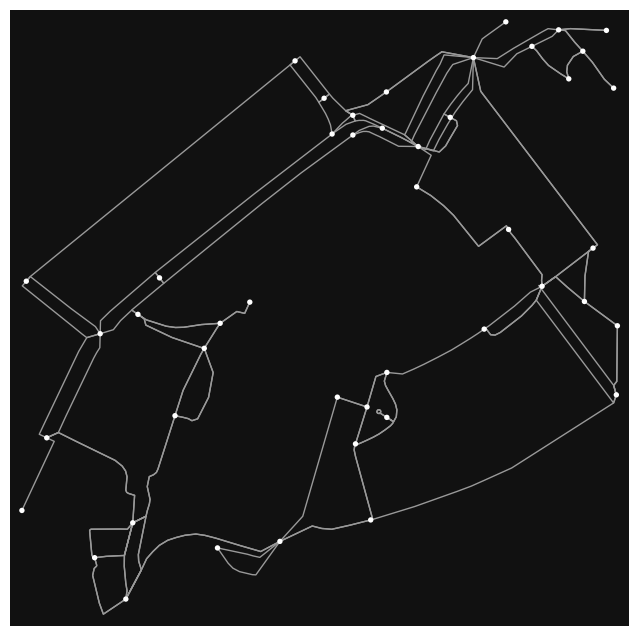

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [35]:
ox.plot_graph(G)

C:\Users\koste\anaconda3\Lib\site-packages\osmnx\simplification.py:585: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  merged = gdf_nodes.buffer(tolerance).union_all()
C:\Users\koste\anaconda3\Lib\site-packages\osmnx\simplification.py:640: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  centroids = node_clusters.centroid


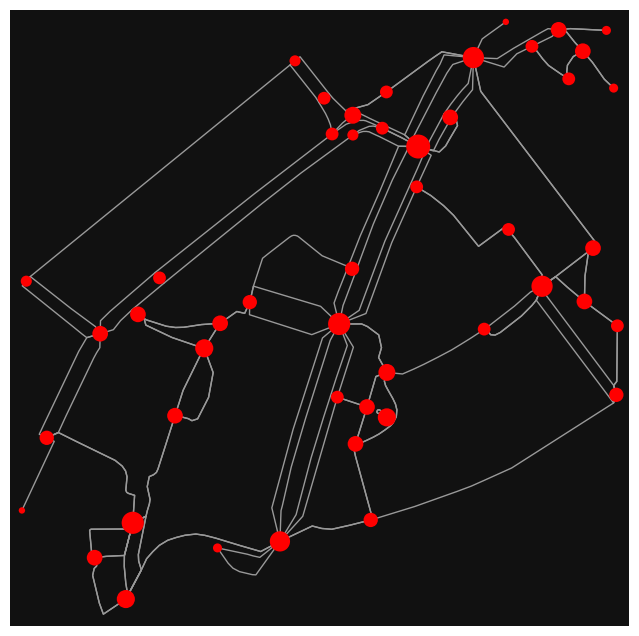

Aantal knooppunten: 48
Aantal edges: 135


In [87]:
#degree centrality, op basis van grootte

import osmnx as ox
import networkx as nx

# Haal de graaf op voor Jätkasaari
#G = ox.graph_from_place("Statenkwartier, Den Haag, Netherlands", network_type="drive")
G = ox.graph_from_address(address="Churchillplein, Den Haag, Netherlands",dist=300)
G = ox.simplification.consolidate_intersections(
    G,
    tolerance=0.00013,  # 30-50 meters om de roundabout radius te dekken
    rebuild_graph=True,
    dead_ends=False,
    reconnect_edges=True
)

# Bereken de degree centrality (geeft per node een waarde tussen 0 en 1)
dc = nx.degree_centrality(G)

# Bepaal de node sizes door de centrality waarden te schalen (pas de schaalfactor naar wens aan)
node_sizes = [dc[node] * 1000 for node in G.nodes()]

# Plot de graaf met de node sizes gebaseerd op degree centrality
ox.plot_graph(G, node_size=node_sizes, node_color='red')

# Toon informatie over het netwerk
num_nodes = G.number_of_nodes()
num_edges = G.number_of_edges()
print(f"Aantal knooppunten: {num_nodes}")
print(f"Aantal edges: {num_edges}")


C:\Users\koste\anaconda3\Lib\site-packages\osmnx\simplification.py:585: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  merged = gdf_nodes.buffer(tolerance).union_all()
C:\Users\koste\anaconda3\Lib\site-packages\osmnx\simplification.py:640: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  centroids = node_clusters.centroid


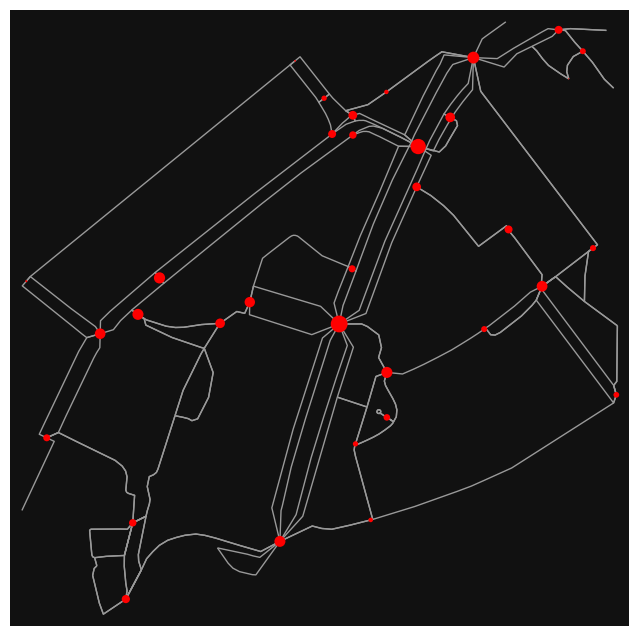

Aantal knooppunten: 48
Aantal edges: 135


In [99]:
#betweenness centrality


import osmnx as ox
import networkx as nx

# Haal de graaf op voor Jätkasaari
G = ox.graph_from_address(address="Churchillplein, Den Haag, Netherlands",dist=300)
G = ox.simplification.consolidate_intersections(
    G,
    tolerance=0.00013,  # 30-50 meters om de roundabout radius te dekken
    rebuild_graph=True,
    dead_ends=False,
    reconnect_edges=True
)

# Bereken de betweenness centrality voor elke node (optioneel met gewicht op 'length')
bc = nx.betweenness_centrality(G, weight='length')

# Bepaal de node sizes door de betweenness centrality waarden te schalen
# Pas de schaalfactor aan om de knoopgrootte naar wens te regelen
node_sizes = [bc[node] * 400 for node in G.nodes()]

# Plot de graaf met node sizes gebaseerd op betweenness centrality
ox.plot_graph(G, node_size=node_sizes, node_color='red')

# Toon informatie over het netwerk
num_nodes = G.number_of_nodes()
num_edges = G.number_of_edges()
print(f"Aantal knooppunten: {num_nodes}")
print(f"Aantal edges: {num_edges}")

C:\Users\koste\anaconda3\Lib\site-packages\osmnx\simplification.py:585: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  merged = gdf_nodes.buffer(tolerance).union_all()
C:\Users\koste\anaconda3\Lib\site-packages\osmnx\simplification.py:640: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  centroids = node_clusters.centroid


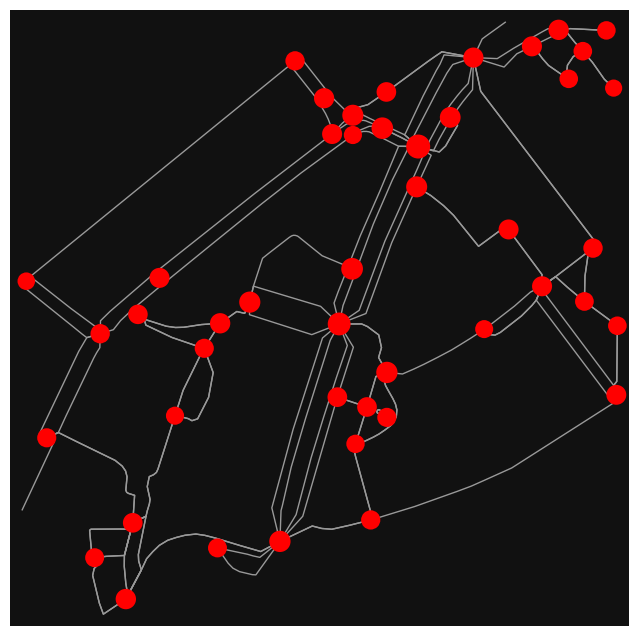

Number of nodes in the graph: 48
Aantal knooppunten: 48
Aantal edges: 135


In [105]:
#closeness centrality

import osmnx as ox
import networkx as nx

# Haal de graaf op voor Jätkasaari
G = ox.graph_from_address(address="Churchillplein, Den Haag, Netherlands",dist=300)
G = ox.simplification.consolidate_intersections(
    G,
    tolerance=0.00013,  # 30-50 meters om de roundabout radius te dekken
    rebuild_graph=True,
    dead_ends=False,
    reconnect_edges=True
)

# Bereken de closeness centrality voor elke node
closeness = nx.closeness_centrality(G)

# Bepaal de node sizes door de closeness waarden te schalen (pas de schaalfactor naar wens aan)
node_sizes = [closeness[node]* 1000 for node in G.nodes()] # * [closeness[node] 
 
# Plot de graaf met de node sizes gebaseerd op closeness centrality
ox.plot_graph(G, node_size=node_sizes, node_color='red')

# Toon informatie over het netwerk
num_nodes = G.number_of_nodes()
num_edges = G.number_of_edges()
print(f"Number of nodes in the graph: {num_nodes}")
print("Aantal knooppunten:", num_nodes)
print("Aantal edges:", num_edges)

In [107]:
num_nodes = len(G.nodes)
num_edges = len(G.edges)
avg_degree = np.mean([deg for _, deg in G.degree()])
density = nx.density(G)

print(f"Nodes: {num_nodes}, Edges: {num_edges}")
print(f"Average Node Degree: {avg_degree:.2f}")
print(f"Network Density: {density:.4f}")

Nodes: 48, Edges: 135
Average Node Degree: 5.62
Network Density: 0.0598


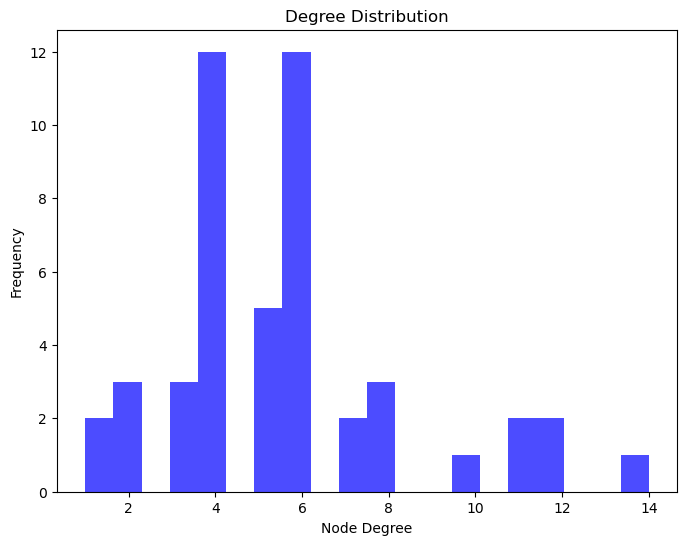

In [109]:

node_degrees = [deg for _, deg in G.degree()]
plt.figure(figsize=(8, 6))
plt.hist(node_degrees, bins=20, color='blue', alpha=0.7)
plt.xlabel("Node Degree")
plt.ylabel("Frequency")
plt.title("Degree Distribution")
plt.show()


In [17]:
#Dijkstra
Y = nx.all_pairs_dijkstra_path_length(G, cutoff=None, weight='weight')
list(Y)

[(0,
  {0: 0,
   13: 1,
   25: 1,
   24: 1,
   27: 2,
   1: 2,
   3: 2,
   4: 2,
   12: 3,
   16: 3,
   22: 3,
   10: 3,
   43: 4,
   30: 4,
   21: 4,
   8: 4,
   33: 5,
   31: 5,
   23: 5,
   9: 5,
   7: 5,
   38: 6,
   34: 6,
   28: 6,
   6: 6,
   37: 7,
   39: 7,
   29: 7,
   11: 7,
   35: 8,
   36: 8,
   40: 8,
   17: 8,
   32: 8,
   5: 8,
   44: 9,
   42: 9,
   41: 9,
   15: 9,
   46: 9,
   45: 10,
   26: 10,
   47: 11,
   18: 12,
   19: 13,
   2: 13,
   14: 14,
   20: 14}),
 (1,
  {1: 0,
   25: 1,
   12: 1,
   24: 1,
   0: 2,
   3: 2,
   43: 2,
   30: 2,
   22: 2,
   4: 2,
   13: 3,
   16: 3,
   33: 3,
   31: 3,
   10: 3,
   27: 3,
   21: 4,
   38: 4,
   34: 4,
   28: 4,
   8: 4,
   23: 5,
   37: 5,
   39: 5,
   29: 5,
   9: 5,
   7: 5,
   35: 6,
   36: 6,
   40: 6,
   17: 6,
   32: 6,
   6: 6,
   44: 7,
   42: 7,
   41: 7,
   15: 7,
   46: 7,
   11: 7,
   45: 8,
   26: 8,
   5: 8,
   47: 9,
   18: 10,
   19: 11,
   2: 11,
   14: 12,
   20: 12}),
 (2,
  {2: 0,
   18: 1,
   19: 2,

In [4]:
#Betweenness centrality

nx.betweenness_centrality(G) 

{2171847046: 0.41144781144781145,
 3065608679: 0.0,
 3065608681: 0.0,
 3065608683: 0.06127946127946128,
 3065608684: 0.013524130190796853,
 3065608686: 0.11784511784511785,
 3065608688: 0.009652076318742986,
 3065608689: 0.04607182940516273,
 3065608692: 0.0,
 3065608693: 0.024971941638608313,
 3065608695: 0.044725028058361385,
 3065608697: 0.1362065095398429,
 3065608698: 0.04078563411896746,
 3065608700: 0.01267115600448934,
 3065608701: 0.015039281705948374,
 3065608702: 0.03244668911335578,
 3065608703: 0.12150392817059484,
 3065608705: 0.12258136924803593,
 3065608707: 0.14006734006734006,
 3065621124: 0.1425364758698092,
 3434658163: 0.0,
 3434658169: 0.15151515151515152,
 3434658181: 0.06374298540965208,
 3434658182: 0.034438832772166104,
 3434658184: 0.12222783389450058,
 3434658187: 0.1437878787878788,
 3434658191: 0.17822671156004488,
 3434658206: 0.01762065095398429,
 3434658211: 0.013484848484848485,
 3434658213: 0.0,
 3434658215: 0.04175645342312009,
 3434658217: 0.0357968

In [5]:
#Degree centrality 
nx.degree_centrality(G) 

{2171847046: 0.10909090909090909,
 3065608679: 0.03636363636363636,
 3065608681: 0.03636363636363636,
 3065608683: 0.10909090909090909,
 3065608684: 0.10909090909090909,
 3065608686: 0.10909090909090909,
 3065608688: 0.10909090909090909,
 3065608689: 0.10909090909090909,
 3065608692: 0.03636363636363636,
 3065608693: 0.10909090909090909,
 3065608695: 0.10909090909090909,
 3065608697: 0.10909090909090909,
 3065608698: 0.10909090909090909,
 3065608700: 0.10909090909090909,
 3065608701: 0.10909090909090909,
 3065608702: 0.10909090909090909,
 3065608703: 0.10909090909090909,
 3065608705: 0.10909090909090909,
 3065608707: 0.05454545454545454,
 3065621124: 0.10909090909090909,
 3434658163: 0.01818181818181818,
 3434658169: 0.05454545454545454,
 3434658181: 0.09090909090909091,
 3434658182: 0.07272727272727272,
 3434658184: 0.10909090909090909,
 3434658187: 0.09090909090909091,
 3434658191: 0.10909090909090909,
 3434658206: 0.05454545454545454,
 3434658211: 0.05454545454545454,
 3434658213: 0

In [21]:
#Local bridges 

nx.local_bridges(G) #not implemented for directed type


NetworkXNotImplemented: not implemented for directed type

In [55]:
#Average path length 
nx.average_shortest_path_length(G) #graph is not strongly connected

NetworkXError: Graph is not strongly connected.

In [11]:
nx.closeness_centrality(G, u=None, distance=None, wf_improved=True)

{2171847046: 0.15877587758775877,
 3065608679: 0.08739162744612336,
 3065608681: 0.0971900826446281,
 3065608683: 0.09838259899609594,
 3065608684: 0.1051564828614009,
 3065608686: 0.11097829506134005,
 3065608688: 0.10246877722916062,
 3065608689: 0.11495601173020528,
 3065608692: 0.10022727272727273,
 3065608693: 0.10909090909090909,
 3065608695: 0.11967435549525103,
 3065608697: 0.14005557761016277,
 3065608698: 0.11662809917355374,
 3065608700: 0.10550239234449763,
 3065608701: 0.1087211093990755,
 3065608702: 0.11878787878787879,
 3065608703: 0.13419551160136933,
 3065608705: 0.14645080946450809,
 3065608707: 0.1431818181818182,
 3065621124: 0.12528409090909093,
 3434658163: 0.0,
 3434658169: 0.11023407729994558,
 3434658181: 0.09517129754518479,
 3434658182: 0.08575595527467186,
 3434658184: 0.1062010836845274,
 3434658187: 0.11748251748251749,
 3434658191: 0.13037694013303772,
 3434658206: 0.08575595527467186,
 3434658211: 0.09517129754518479,
 3434658213: 0.08739162744612336,
 